In [33]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.special import factorial
from scipy.special import gamma
from scipy.stats import erlang

In [34]:
eta0=np.sqrt(sc.mu_0/sc.epsilon_0)

calculate SNR for green imaging Yb based on Thompson powers

In [35]:
objNA = 0.6
l = 556e-9
omega0 = sc.c/l
gamma = (182.4e3)
tau = 1/gamma
Delta = 20*gamma
Isat = 1.39
# Iim = 3*Isat
# gammaSc = (3*np.pi*sc.c**2)*((gamma/Delta)**2)*(Iim)/(2*sc.hbar*(omega0)**3)
# print(gammaSc*(1e-3))
gammaScJ = 0.29*gamma/2
print('scattering rate for green (Iim=3*Isat) =  {:.1f} kHz'.format(gammaScJ*(1e-3)))

scattering rate for green (Iim=3*Isat) =  26.4 kHz


In [36]:
Isat

1.39

collection rate for blue imaging:

In [37]:
objSA = 2*np.pi*(1-np.cos(np.arcsin(0.6)))
cfrac = 0.1#0.5*objSA/(4*np.pi)
cRate = 3.1e3#cfrac*gammaScJ
print('collection rate for green =  {:.1f} kHz'.format(cRate*(1e-3)))

collection rate for green =  3.1 kHz


$$
\frac{QE*s}{\sqrt{F_n^2*QE*s + (n_r)^2}}
$$

when $F_n^2*QE*s = n_r^2$, 

## camera SNR @ 556 nm

In [6]:
tRead = 30e-3
tExp = 0.5
QE = 0.95
QEzyla = 0.82
QEzylaAvg = 0.76
QEemccd = 0.97
QEemccdAvg = 0.92
QEprime = 0.95
Nr = 2.9*0.71
Nremccd = 40
Ib = 0
Idark = 0.2
Idarkemccd = 11e-4
M = 40
M2 = 1000
Fn = np.sqrt(2)
Fn2 = np.sqrt(2)
numPixels = 3
Rs = np.linspace(1e2,5e4,300)
Is = Rs*cfrac
s = Is*tRead
pperpixel = s/numPixels
SNRcmos = (QE*s)/np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
SNRemccd = (QEemccd*s)/np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M)**2)
SNRemccd2 = (QEemccd*s)/np.sqrt((Fn2**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M2)**2)
# SNRemccdAvg = (QEemccdAvg*s)/np.sqrt((Fn2**2)*QEemccdAvg*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M2)**2)
SNR0 = s/np.sqrt(s)

<ipython-input-7-58976f5235d0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));


Text(0.5, 1.0, '10% collection eff., 2x2 binning, 556 nm, 30 ms read')

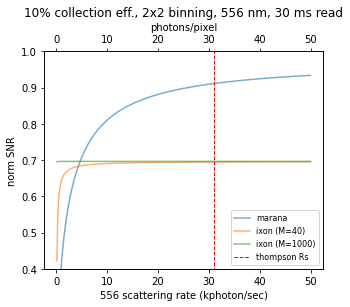

In [7]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(Rs*(1e-3), SNRcmos/SNR0, label='marana', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd/SNR0, label='ixon (M=40)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd2/SNR0, label='ixon (M=1000)', alpha=0.6)
ax.plot([cRate*(1e-2),cRate*(1e-2)], [0,1], 'r--', linewidth=1, label='thompson Rs')
ax.set_xlabel('556 scattering rate (kphoton/sec)')
ax.set_ylabel('norm SNR')
# plt.xlim([0,50])
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));
ax2.set_xlabel('photons/pixel')
ax.legend(prop={'size': 8})
plt.ylim([0.4,1])
plt.title('10% collection eff., 2x2 binning, 556 nm, 30 ms read')

<ipython-input-8-59234f894313>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));


Text(0.5, 1.0, '7.5% collection eff., 2x2 binning, 556 nm, 30 ms read')

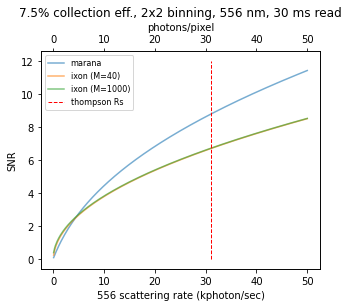

In [8]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(Rs*(1e-3), SNRcmos, label='marana', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd, label='ixon (M=40)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd2, label='ixon (M=1000)', alpha=0.6)
ax.plot([cRate*(1e-2),cRate*(1e-2)], [0,12], 'r--', linewidth=1, label='thompson Rs')
ax.set_xlabel('556 scattering rate (kphoton/sec)')
ax.set_ylabel('SNR')
# plt.xlim([1,1000])
# plt.ylim([0,10])
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));
ax2.set_xlabel('photons/pixel')
ax.legend(prop={'size': 8})
# plt.ylim([0.5,1])
plt.title('7.5% collection eff., 2x2 binning, 556 nm, 30 ms read')

read speed

(1, 10)

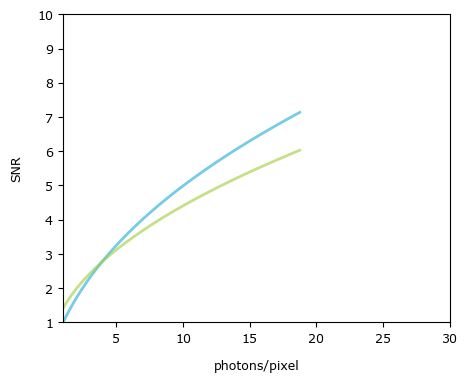

In [14]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(pperpixel, SNRzylaAvg, label='zyla (540 MHz, avg QE=0.76)', alpha=0.6)
ax.plot(pperpixel, SNRemccd2, label='ixon (M=1000)', alpha=0.6)
ax.set_xlabel('photons/pixel')
ax.set_ylabel('SNR')
plt.xlim([1,30])
plt.ylim([1,10])

## camera SNR @ 399 nm

In [8]:
tRead = 75e-3
tExp = 0.5
QE = 0.6
QEprime = 0.65
QEzyla = 0.4
QEemccd = 0.7
Nr = 1.6
Nrprime = 1.8
NrZyla = 1.3
NrZylaSlow = 1.1
Nremccd = 40
Ib = 0
Idark = 0.2
Idarkemccd = 11e-4
M = 1000
Fn = np.sqrt(2)
numPixels = 4
Rs = np.linspace(1e2,1.5e4,300)
Is = Rs*cfrac
s = Is*tRead
pperpixel = s/numPixels
SNRcmos = (QE*s)/np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
SNRprime = (QEprime*s)/np.sqrt(QEprime*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nrprime)**2)
SNRzyla = (QEzyla*s)/np.sqrt(QEzyla*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(NrZyla)**2)
SNRzylaSlow = (QEzyla*s)/np.sqrt(QEzyla*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(NrZylaSlow)**2)
SNRemccd = (QEemccd*s)/np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M)**2)
SNR0 = s/np.sqrt(s)

<ipython-input-9-fbce528c2586>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));


(0.3, 0.8)

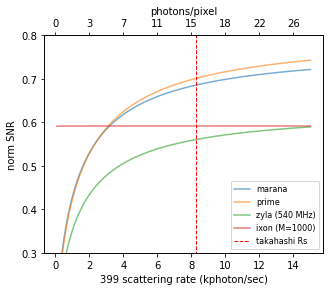

In [9]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(Rs*(1e-3), SNRcmos/SNR0, label='marana', alpha=0.6)
ax.plot(Rs*(1e-3), SNRprime/SNR0, label='prime', alpha=0.6)
# ax.plot(Rs*(1e-3), SNRzylaSlow/SNR0, label='zyla (216 MHz)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRzyla/SNR0, label='zyla (540 MHz)', alpha=0.6)
# ax.plot(Rs*(1e-3), SNRemccd/SNR0, label='ixon (M=40)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd/SNR0, label='ixon (M=1000)', alpha=0.6)
ax.plot([8.3,8.3], [0,1], 'r--', linewidth=1, label='takahashi Rs')
ax.set_xlabel('399 scattering rate (kphoton/sec)')
ax.set_ylabel('norm SNR')
# plt.xlim([0,50])
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));
ax2.set_xlabel('photons/pixel')
ax.legend(prop={'size': 8})
plt.ylim([0.3,0.8])

<ipython-input-10-bd8a62f3e3a0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));


Text(0.5, 1.0, '7.5% collection eff., 2x2 binning, 399 nm, 100 ms read')

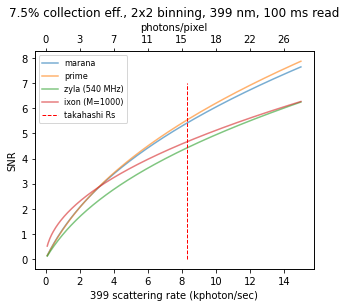

In [10]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(Rs*(1e-3), SNRcmos, label='marana', alpha=0.6)
ax.plot(Rs*(1e-3), SNRprime, label='prime', alpha=0.6)
# ax.plot(Rs*(1e-3), SNRzylaSlow, label='zyla (216 MHz)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRzyla, label='zyla (540 MHz)', alpha=0.6)
ax.plot(Rs*(1e-3), SNRemccd, label='ixon (M=1000)', alpha=0.6)
ax.plot([8.3,8.3], [0,7], 'r--', linewidth=1, label='takahashi Rs')
ax.set_xlabel('399 scattering rate (kphoton/sec)')
ax.set_ylabel('SNR')
# plt.xlim([1,1000])
# plt.ylim([0,10])
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
# ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(((1e3)*ax.get_xticks()*(cfrac*tRead/numPixels)).astype(int));
ax2.set_xlabel('photons/pixel')
ax.legend(prop={'size': 8})
# plt.ylim([0.5,1])
plt.title('7.5% collection eff., 2x2 binning, 399 nm, 100 ms read')

# image fidelity

In [70]:
s = 60
numPixels = 10
Nr = 2.8*0.71
Nremccd = 1.2
# M = 300
maranaAtomSigma = np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
maranaVoidSigma = np.sqrt(numPixels*(Nr)**2)
ixonAtomSigma = np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M)**2)
ixonVoidSigma = np.sqrt((Nremccd)**2)

def gaussian(x,x0,sigma):
    return (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-((x-x0)**2)/(2*(sigma**2)))

def emccd_gain_distr(x,g,n):
    return (x**(n-1))*np.exp(-x/g)/((g**n)*factorial(n-1))

def poisson(n,k):
    return (n**k)*np.exp(-n)/factorial(k)

def emccd_distr(xs,g,n0):
    ns = np.arange(1,3*n0)
    n_distr = gaussian(ns,n0,np.sqrt(n0))
    gain_distr = []
    em_distr = []
    for x in xs:
        gain_distr = emccd_gain_distr(x,g,ns)
        em_distr.append(np.sum(n_distr*gain_distr))
    return np.array(em_distr)

In [123]:
s = 15
numPixels = 10
Nr = 3.2*0.71
Nremccd = 0.95
# M = 300
maranaAtomSigma = np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
maranaVoidSigma = np.sqrt(numPixels*(Nr)**2)
ixonAtomSigma = np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd)**2)
ixonVoidSigma = np.sqrt((Nremccd)**2)

xs = np.arange(2,40,1)
# min(infidelity(xs,15,0,ixonAtomSigma,ixonVoidSigma))
min(infidelity(xs,s,0,maranaAtomSigma,maranaVoidSigma))

0.3172269429041715

In [77]:
3.2/2.8

1.142857142857143

In [49]:
counts = 50
nume = counts*0.71
numph = nume/QE
(numph-counts)/counts

0.18333333333333343

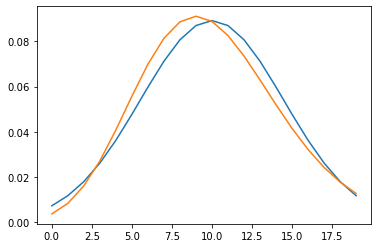

In [40]:
xs = np.arange(2,30,1)
# plt.semilogy(emccd_gain_distr(xs,1,10))
plt.plot(gaussian(xs,20,np.sqrt(20)))
plt.plot(erlang.pdf(xs,20))

In [98]:
x = np.linspace(-20,100,200)
maranaCounts = 0.5*gaussian(x,s,maranaAtomSigma) + 0.5*gaussian(x,0,maranaVoidSigma)
ixonCounts = 0.5*gaussian(x,s,ixonAtomSigma) + 0.5*gaussian(x,0,ixonVoidSigma)
ixonCountsErlan = 0.5*erlang.pdf(x,s) + 0.5*gaussian(x,0,ixonVoidSigma)

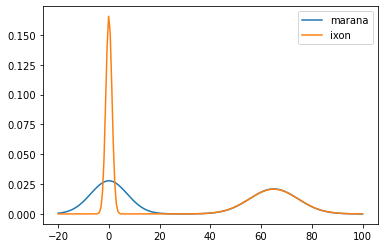

In [99]:
plt.plot(x, maranaCounts, label='marana')
plt.plot(x, ixonCounts, label='ixon')
# plt.plot(x, ixonCountsErlan)
plt.legend()

In [104]:
def infidelity(x,xAtom,xVoid,sigmaAtom,sigmaVoid):
    iAtom = 0.5*special.erfc((xAtom-x)/np.sqrt(2*(sigmaAtom**2)))
    iVoid = 0.5*special.erfc((x-xVoid)/np.sqrt(2*(sigmaVoid**2)))
    return iAtom + iVoid

def infidelity_emccd(x,xAtom,xVoid,sigmaVoid):
    iAtom = 0.5*(erlang.cdf(x,xAtom))
    iVoid = 0.5*special.erfc((x-xVoid)/np.sqrt(2*(sigmaVoid**2)))
    return iAtom + iVoid

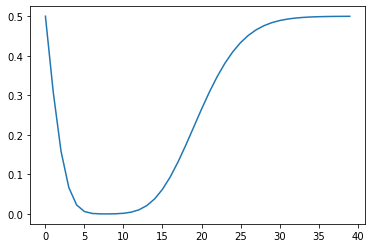

In [81]:
xs = np.arange(40)
plt.plot(infidelity_emccd(xs,20,0,2))

In [146]:
minInfidelitiesIxon = []
minInfidelitiesMarana = []
minInfidelitiesIxonErlang = []
sigs = np.arange(10,120)
for s in sigs:
    t = np.linspace(0,s,200)
    maranaAtomSigma = np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
    maranaVoidSigma = np.sqrt(numPixels*(Nr)**2)
    ixonAtomSigma = np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd)**2)
    ixonVoidSigma = np.sqrt((Nremccd)**2)
    iMarana = np.min(infidelity(t,s,0,maranaAtomSigma,maranaVoidSigma))
    iIxon = np.min(infidelity(t,s,0,ixonAtomSigma,ixonVoidSigma))
    iIxonErlang = np.min(infidelity_emccd(t,s,0,ixonVoidSigma))
    minInfidelitiesMarana.append(iMarana)
    minInfidelitiesIxon.append(iIxon)
    minInfidelitiesIxonErlang.append(iIxonErlang)

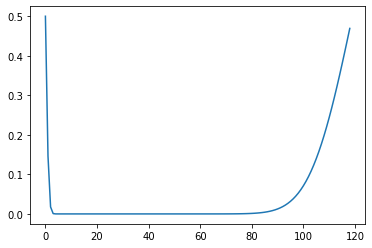

In [109]:
plt.plot(t,infidelity(t,s,0,ixonAtomSigma,ixonVoidSigma))

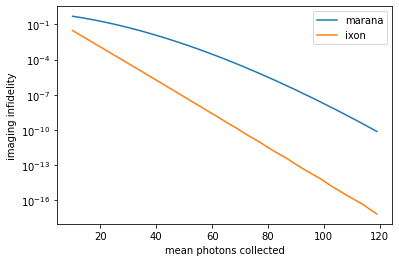

In [147]:
plt.semilogy(sigs, minInfidelitiesMarana, label='marana')
plt.semilogy(sigs, minInfidelitiesIxon, label='ixon')
# plt.semilogy(sigs, minInfidelitiesIxonErlang, label='ixonErlang')
plt.xlabel('mean photons collected')
plt.ylabel('imaging infidelity')
plt.legend()

In [94]:
sigs[60]

65

In [141]:
minInfidelitiesIxon[5]

0.005982429690245019

In [144]:
minInfidelitiesMarana[34]

0.005995430254725704

In [145]:
sigs[5]/sigs[34]

0.3409090909090909

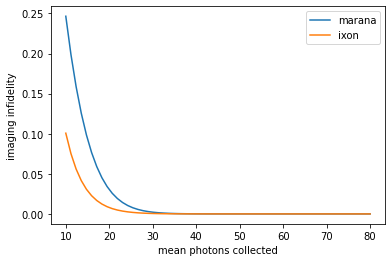

In [329]:
plt.plot(sigs, minInfidelitiesMarana, label='marana')
plt.plot(sigs, minInfidelitiesIxon, label='ixon')
plt.xlabel('mean photons collected')
plt.ylabel('imaging infidelity')
plt.legend()

Text(0.5, 1.0, 'SNR comparison, 4 pixels of readnoise for marana')

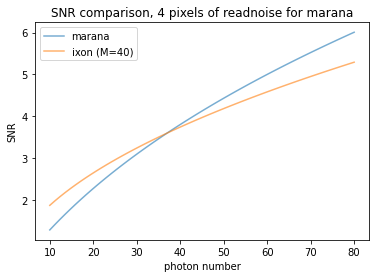

In [277]:
s = sigs
SNRcmos = (QE*s)/np.sqrt(QE*(s+numPixels*Idark*tRead+Ib*tRead) + numPixels*(Nr)**2)
SNRemccd = (QEemccd*s)/np.sqrt((Fn**2)*QEemccd*(s+numPixels*Idarkemccd*tRead+Ib*tRead) + (Nremccd/M)**2)

fig, ax = plt.subplots()
ax.plot(sigs, SNRcmos, label='marana', alpha=0.6)
ax.plot(sigs, SNRemccd, label='ixon (M=40)', alpha=0.6)
ax.set_xlabel('photon number')
ax.set_ylabel('SNR')
ax.legend()
plt.title('SNR comparison, 4 pixels of readnoise for marana')

## USB 3.0 vs Camera Link

USB 3.0 has 5 Gbit/s speed, 4 Gbit/s raw data with encoding, can achieve >3.2 GBit/s in practice

CL has serial frame clock 40-85 MHz (75 MHz? for 10-tap). 80 bit per clock cycle.

In [18]:
USB3Speed = 3.2e9
CLSpeed = (85e6)*80
CLSpeed*(1e-9)

6.800000000000001

Marana data output:
max rate 4.2 Mpixel w/ 200 MHz, 48 fps
12 bit at 200 MHz

In [19]:
MaranaOut = (200e6)*12
MaranaOut*(1e-9)

2.4000000000000004

In [20]:
ZylaOut = (540e6)*12
ZylaOut*(1e-9)

6.48

In [21]:
(2048*30)/(200e6)

0.0003072

In [22]:
((2048*0.3*30/22.5)**2)/(200e6)

0.0033554432000000006

# Rolling shutter

using 10 um atom spot on camera, ~ 20X mag. FOV = 0.3 mmm -> 6 mm

In [61]:
((2048*0.3*20/13)**2)/(216e6)

0.004136394477317555

In [5]:
2048/(200e6)

1.024e-05

In [36]:
2048*0.3*20/22.5

546.1333333333333

In [45]:
cfrac = 0.1
cRate = 3.1e4*cfrac
tRead = 30e-3
QE = 0.95
QEzyla = 0.82
Nr = 3.2#1.6
NrZyla = 1.3
M = 1000
Fn2 = np.sqrt(2)
numPixels = np.arange(1,7)**2
s = cRate*tRead
# SNRzyla = (QEzyla*s)/np.sqrt(QEzyla*(s+numPixels) + numPixels*(NrZyla)**2)
SNRmarana = (QE*s)/np.sqrt(QE*s + numPixels*(Nr)**2)
SNRemccd = (QEemccd*s)/np.sqrt((Fn**2)*QEemccd*(s) + (Nremccd/M)**2)
SNR0 = s/np.sqrt(s)

Text(0.5, 1.0, '10% collection eff., binning SNR, total photons=93')

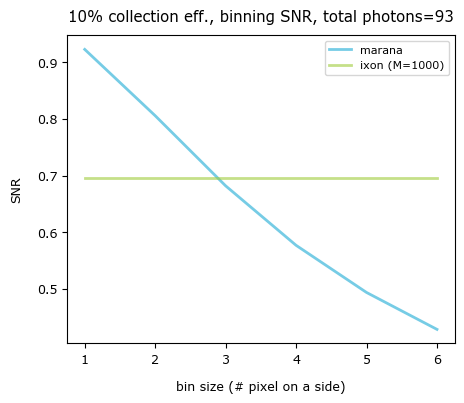

In [46]:
fig, ax = plt.subplots(figsize=[5,4])
ax.plot(np.sqrt(numPixels), SNRmarana/SNR0, label='marana', alpha=0.6)
ax.plot(np.sqrt(numPixels), np.ones_like(numPixels)*SNRemccd/SNR0, label='ixon (M=1000)', alpha=0.6)
ax.set_xlabel('bin size (# pixel on a side)')
ax.set_ylabel('SNR')
ax.legend(prop={'size': 8})
plt.title('10% collection eff., binning SNR, total photons={:d}'.format(int(s)))

In [69]:
T = 2.7833
R6 = 3.3e6
R4 = 820e3
C2 = T/(2*R6)
C1 = T/(8*R4)
print(C1, C2)

4.242835365853659e-07 4.2171212121212124e-07


In [72]:
8.8/3

2.9333333333333336

# Prime 95B

In [4]:
ps = 11e-6
FOV = 300e-6
rowReadTime = (1/82)/1200
rowReadTime

1.016260162601626e-05

In [8]:
numPixelsFOV = (30*FOV/ps)**2
np.sqrt(numPixelsFOV)

818.1818181818181

In [11]:
30*(500e-9)

1.4999999999999999e-05

In [13]:
readOffset = np.sqrt(numPixelsFOV)*rowReadTime
readOffset

0.008314855875831485

In [155]:
7.50*((0.160*0.45)**2)

0.03888000000000001